# chapter4 The process of data
## 4.1 fit in
### 4.1.1 error analysis
We always employ **least square method**
$$
\begin{cases}
\delta_i=f(x_i)-y_i\\
\sum_{i=0}^n=\delta_i^2
\end{cases}
$$

In [2]:
# Library
import numpy as np
# Data
x_array=np.linspace(1,2*np.pi,100)
measure_array=np.sin(x_array)+np.random.uniform(-0.01,0.01)
theory_array=np.sin(x_array)
# Calculate
delta_array=theory_array-measure_array
print(np.sum(delta_array**2))

0.004871928082585036


### 4.1.1 The measures to fit
#### 4.1.1.1 多项式拟合
```python
# 得到拟合系数
np.polyfit(x, y, deg,rcond=None,Full=False,w=None,cov=False)
# 便捷转化为函数
f=np.poly1d(coefs，r = False，变量= None) #r指定根；变量为print时的指定。
print(f(1))
```
x:array类型,M个样本的x坐标

y:array类型,M个样本的x坐标

deg:int型常量，拟合的多项式的最高次项

coeff ：返回值，正则方程组的系数，为deg+1

           2
5.337e-05 x + 0.007537 x - 0.0004476


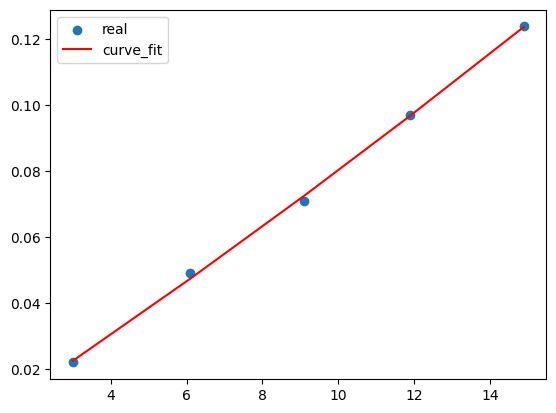

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 需要拟合的数据组
x_group = np.array([3, 6.1, 9.1, 11.9, 14.9])
y_group = np.array([0.0221, 0.0491, 0.0711, 0.0971, 0.1238])
# calculate
coefs = np.polyfit(x_group, y_group,2)
f=np.poly1d(coefs)
print(f)
theory_array=f(x_group)

# 数据点与原先的进行画图比较
plt.scatter(x_group, y_group, marker='o',label='real')
plt.plot(x_group, theory_array,color='red',label='curve_fit')
plt.legend()
plt.title('' )
plt.show()


#### 4.1.1.2 Self-definition
相信我，其他自定义拟合函数都是狗都不用的东西，研究它们你将浪费宝贵的30min
```python
coefs,pcov=spo.curve_fit(f,xdata,ydata,p0=None,sigma=None,absolute_sigma=False,check_finite=True,bounds=(-inf,inf),method=None,jac=None,**kwargs)
'''
# Input
## p0就是给你的函数的参数确定一个初始值来减少计算机的计算量；当然，也有可能增加。
# Output
## coeffients
## pcov 2d array
'''
```

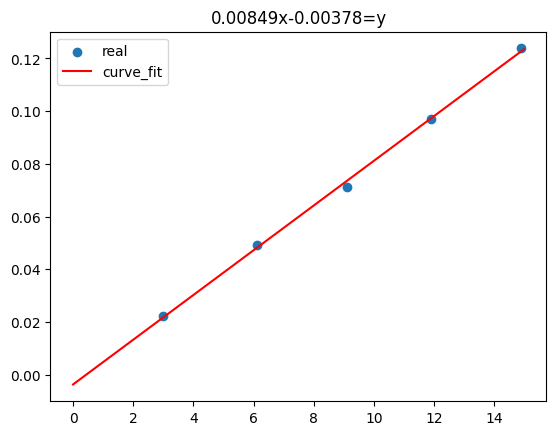

In [4]:
# 引用库函数
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco #This Library
# 需要拟合的函数
def f_1(x, A, B):
    return A * x + B

# 需要拟合的数据组
x_group = np.array([3, 6.1, 9.1, 11.9, 14.9])
y_group = np.array([0.0221, 0.0491, 0.0711, 0.0971, 0.1238])
# 得到返回的A，B值
coefs, pcov = sco.curve_fit(f_1, x_group, y_group)
A=coefs[0]
B=coefs[1]

# 数据点与原先的进行画图比较
plt.scatter(x_group, y_group, marker='o',label='real')
x = np.arange(0, 15, 0.01)
y = A * x + B
plt.plot(x, y,color='red',label='curve_fit')
plt.legend()
plt.title('%.5fx%.5f=y' % (A, B))
plt.show()


## 4.2 cluster analysis

### 4.2.0 Euclidean distance
1. 归一
2. 去相关
3. 加权
4. 计算绝对距离分类
### 4.2.1 k-means
1. Assume there are k centers, the center is random.
2. Accoding to distance to divide equally the pioints.
3. Reset the centers accoding to every kinds of points
4. repeat.

* Virtue

fast speed
* flaw
1. 孤立点敏感。
2. K难以预先给定。
3. 初始值有影响。
## 4.3 FFT
### Therory
* 采样频率：原信号离散化程度，即一秒钟取多少个点。

* 采样定理：**保证采样频率为信号最高频率(要经验判断)的2.56～4倍**；

在后面的例子中，信号最高频率为600，于是采样频率为1400。如若时间区间为[0,T], 则细分应该是[0,T,(T-0)*1400]
#### Code to explain

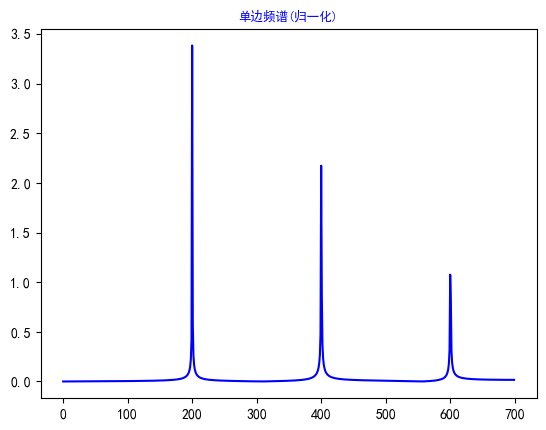

In [6]:
# Library
import numpy as np
from scipy.fftpack import fft,ifft #core
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号

# Date
## parameter
N=1400 #采样频率，这个需要函数形式来确定。
## 时谐谱
x=np.linspace(0,1,(1-0)*N)    
y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x)+3*np.sin(2*np.pi*600*x)  #设置需要采样的信号，频率分量有200，400和600
## amplitude 做x轴用
N_amplitude=np.arange(N)

# FFT
fft_y=fft(y)
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.arange(0,N)              #取复数的角度
## 归一化处理（双边频谱）
normalization_y=abs_y/N   
## 取半处理
half_x = N_amplitude[range(int(N/2))]                              #取一半区间
normalization_half_y = normalization_y[range(int(N/2))] 

# Graph
plt.figure()
plt.plot(half_x,normalization_half_y,'b')
plt.title('单边频谱(归一化)',fontsize=9,color='blue')
plt.show()

## 4.4 root
### 二分
收敛慢但总能找到一个零点


In [10]:
x=np.array([1,4,3,34,5])
np.diff(x)

array([  3,  -1,  31, -29])

### 切线
一阶泰勒近似，导数是真要求得。
$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}
$$
### 弦割
向后差分近似切线法中的导数。
$$
x_{n+1}=x_n-f(x_n)\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})}
$$

后两种方法可能不收敛，但快。

### SUM
该代码以二分定位置，弦割收敛

In [53]:
# Libary
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import sympy as sp #此库精通解析解。


# 二分法判断子区间是否存在（实际不严格）零点
def half(func,subrange_x):
    if func(subrange_x[0])*func(subrange_x[1])<=0:
        return 1
    else:
        return 0
# 指定子区间以弦割法零点精确计算，要求最大误差：limited_error,最多迭代N次防止死循环。
def chord_cut(func,subrange_x,limited_error,N=100):  
    positiona=subrange_x[0]
    positionb=subrange_x[1]
    for i in range(N):
        k=(positiona-positionb)/(func(positiona)-func(positionb))
        t=positionb-func(positionb)*k
        error=np.abs(func(t))
        if error<limited_error:
            return t,error,i
        else:
            positiona=positionb
            positionb=t
            if i==N-1:
                print("别找了，找不到")
                return t,error,i     
# 综合函数，二分法定零点个数，然后弦割法收敛。
## Input 
## Output [[区间0][区间1]...];[[x0,error,N],[]]
def solve_zero(range_x,func,method1=half,method2=chord_cut,limited_error=1e-6,N=100):  
    # 二分法定零点个数,所在子区间
    zero_subrange=np.zeros((1,2))
    for i in range(np.size(range_x)-1):
        subrange_x=np.array([[range_x[i],range_x[i+1]]])
        if half(func,subrange_x[0,:]):
            zero_subrange=np.concatenate((zero_subrange,subrange_x),axis=0) 
    zero_subrange=zero_subrange[1:,:]
    # 弦割法收敛
    zero_value_infor=np.zeros(((np.shape(zero_subrange))[0],3))
    for i in range((np.shape(zero_subrange))[0]):
        subrange_x=zero_subrange[i,:]
        zero_value_infor[i,:]=chord_cut(func,subrange_x,limited_error,N)
    return zero_subrange,zero_value_infor
#---------------------main----------------------------
## 定义求解函数形式
def func(x):
    return np.sin(x)
range_x=np.linspace(-1,4,1000)
# 函数零点信息
zero_subrange,zero_value_infor=solve_zero(range_x,func,method1=half,method2=chord_cut,limited_error=1e-6,N=100)
print(zero_subrange)
print(zero_value_infor)

[[-4.00400400e-03  1.00100100e-03]
 [ 3.13913914e+00  3.14414414e+00]]
[[-2.00601467e-09  2.00601467e-09  0.00000000e+00]
 [ 3.14159265e+00  1.02223885e-10  0.00000000e+00]]
